<a href="https://colab.research.google.com/github/nOTpROGRAMMERr/ML_Projects/blob/main/Regression/Student_Performance_(Multiple_Linear_Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Single Regression

In [142]:
df = pd.read_csv('Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [143]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

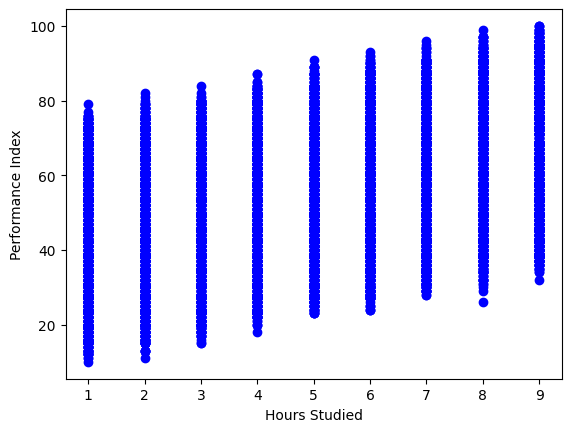

In [144]:
plt.scatter(train["Hours Studied"],train["Performance Index"],color='blue')
plt.xlabel("Hours Studied")
plt.ylabel("Performance Index")
plt.show()


In [145]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[["Previous Scores"]])
train_y = np.asanyarray(train[["Performance Index"]])
regr.fit(train_x,train_y)
print("Coefficients: ",regr.coef_)
print("Intercept: ",regr.intercept_)

Coefficients:  [[1.01351312]]
Intercept:  [-15.16988042]


In [146]:
test_x = np.asanyarray(test[["Previous Scores"]])
test_y = np.asanyarray(test[["Performance Index"]])
test_y_ = regr.predict(test_x)
print("Residual sum of squares: %.2f" % np.mean((test_y_ - test_y) ** 2))
print("Variance score: %.2f" % regr.score(test_x,test_y))

Residual sum of squares: 61.42
Variance score: 0.83


**output**

In [147]:
result = regr.predict([[51]])
print("Result: ",result[0][0])

Result:  36.51928866008862


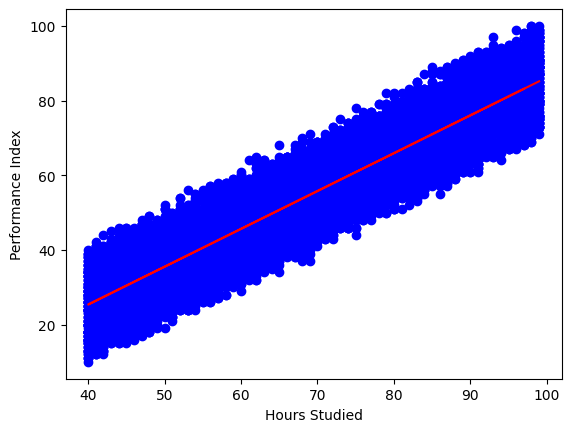

In [148]:
plt.scatter(train["Previous Scores"],train["Performance Index"],color='blue')
plt.plot(train_x,regr.coef_[0][0]*train_x + regr.intercept_[0],'-r')
plt.xlabel("Hours Studied")
plt.ylabel("Performance Index")
plt.show()

In [149]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [150]:
train["Extracurricular Activities"] = train["Extracurricular Activities"].map({'Yes': 1, 'No': 0})
test["Extracurricular Activities"] = test["Extracurricular Activities"].map({'Yes': 1, 'No': 0})

<ipython-input-150-1f801db1bf1b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Extracurricular Activities"] = train["Extracurricular Activities"].map({'Yes': 1, 'No': 0})
<ipython-input-150-1f801db1bf1b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Extracurricular Activities"] = test["Extracurricular Activities"].map({'Yes': 1, 'No': 0})


In [151]:
# Check if 'train' is None before attempting to fill missing values
if train is not None:
    train.fillna(train.mean(), inplace=True)  # Fill NaN with the mean of each column
else:
    print("Warning: 'train' is None. Please load or create your training data.")

<ipython-input-151-686f9ca89375>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.fillna(train.mean(), inplace=True)  # Fill NaN with the mean of each column


multiple regr

In [152]:
regr = linear_model.LinearRegression()
x_train = np.asanyarray(train[["Hours Studied","Previous Scores","Extracurricular Activities","Sleep Hours","Sample Question Papers Practiced"]])
y_train = np.asanyarray(train[["Performance Index"]])
regr.fit(x_train,y_train)
print("Coefficients: ",regr.coef_)
print("Intercept: ",regr.intercept_)


Coefficients:  [[2.85330349 1.01869669 0.64411899 0.48115509 0.19193344]]
Intercept:  [-34.12283224]


In [153]:
x_test = np.asanyarray(test[["Hours Studied","Previous Scores","Extracurricular Activities","Sleep Hours","Sample Question Papers Practiced"]])
y_test = np.asanyarray(test[["Performance Index"]])

In [154]:
y_ = regr.predict(x_test)
print("Residual sum of squares: %.2f" % np.mean((y_ - y_test) ** 2))
print("Variance score: %.2f" % regr.score(x_test,y_test))

Residual sum of squares: 4.02
Variance score: 0.99


In [155]:
regr.predict([[8,51,1,7,2]])
#

array([[45.0531985]])

In [156]:
hr = int(input("Enter hours studied: "))
ps = int(input("Enter previous scores: "))
ea = int(input("Enter extracurricular activities: "))
sl = int(input("Enter sleep hours: "))
sq = int(input("Enter sample question papers practiced: "))

result = regr.predict([[hr,ps,ea,sl,sq]])
print("Result: ",result[0][0])

Enter hours studied: 8
Enter previous scores: 89
Enter extracurricular activities: 1
Enter sleep hours: 8
Enter sample question papers practiced: 3
Result:  84.43676135281999
